In [7]:
%matplotlib inline 
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

In [ ]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [2]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

In [5]:
df_shift = df.shift()

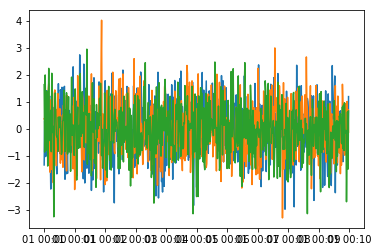

In [8]:
plt.plot(df)

In [4]:
df.head()

,A,B,C
2016-07-01 00:00:00,-1.345474,0.364982,1.632261
2016-07-01 00:00:01,0.288377,0.363118,-0.867564
2016-07-01 00:00:02,-0.665869,1.271590,1.991365
2016-07-01 00:00:03,-1.033494,0.295274,0.219008
2016-07-01 00:00:04,1.411177,-0.424018,-0.796365


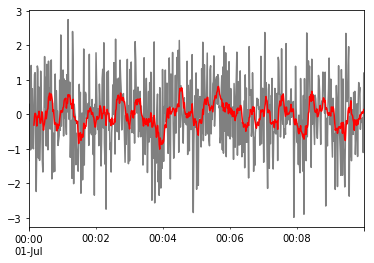

In [17]:
df['A'].plot(color='grey')
r.mean()['A'].plot(color='red')

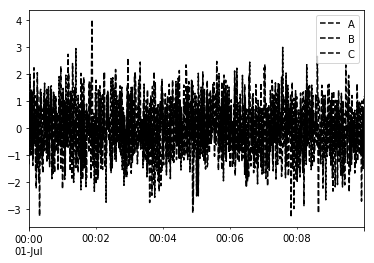

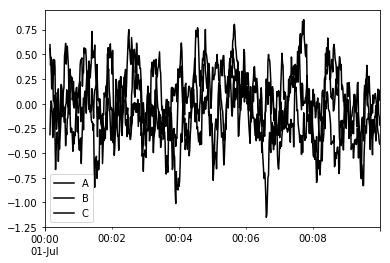

In [21]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [22]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

/Users/harishprabhala/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  from ipykernel import kernelapp as app


,A,B,C
2016-07-01 00:00:01,-0.474086,0.363988,0.299021
2016-07-01 00:00:02,-0.546714,0.707695,0.939909
2016-07-01 00:00:03,-0.693753,0.583117,0.722150
2016-07-01 00:00:04,-0.153574,0.324661,0.332460
2016-07-01 00:00:05,-0.340873,0.548064,0.490516
2016-07-01 00:00:06,-0.118683,0.463534,0.676635
2016-07-01 00:00:07,-0.253977,0.212230,0.284009
2016-07-01 00:00:08,-0.387815,0.431851,0.325146
2016-07-01 00:00:09,-0.276852,0.642519,0.649342


In [36]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [37]:
df.head()

,A,B,C,D
2016-06-06,1.481612,1.768440,-0.321823,0.301426
2016-06-07,0.235998,0.185328,-2.037219,-1.318122
2016-06-08,-0.173062,1.265989,-0.343580,-0.247671
2016-06-09,-0.385062,1.426180,0.012542,1.208518
2016-06-10,-0.047345,-0.526411,0.115269,0.067752


array([<matplotlib.axes._subplots.AxesSubplot object at 0x113815128>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1139549e8>], dtype=object)

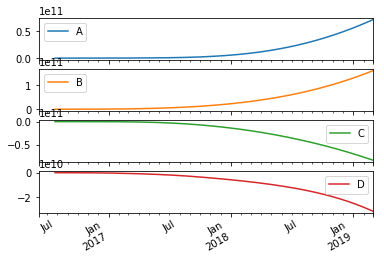

In [41]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [42]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,8.348413e+01,1.801208e+02,1.148610e+02,1.091187e+01


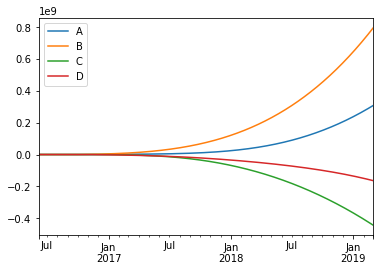

In [48]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean().plot()

In [ ]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?

In [ ]:
# EWMA
# Why use EWMA?
# To retain the old data in addition to the new one

In [45]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [ ]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting

In [51]:
from pandas_datareader import data as web

In [66]:
start = pd.Timestamp('2010-1-1')
end = pd.Timestamp('2013-1-27')
f = web.DataReader("F", 'yahoo', start, end)

In [53]:
f.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,10.17,10.28,10.05,10.28,60855800,8.306784
2010-01-05,10.45,11.24,10.40,10.96,215620200,8.856260
2010-01-06,11.21,11.46,11.13,11.37,200070600,9.187561
2010-01-07,11.46,11.69,11.32,11.66,130201700,9.421897
2010-01-08,11.67,11.74,11.46,11.69,130463000,9.446138


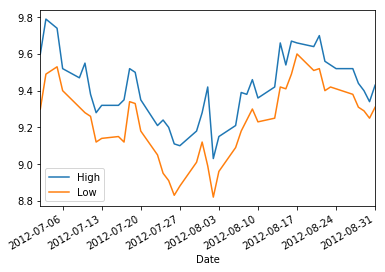

In [56]:
# Find highs and lows for July and August only
f['July 2012':'August 2012'][['High','Low']].plot()

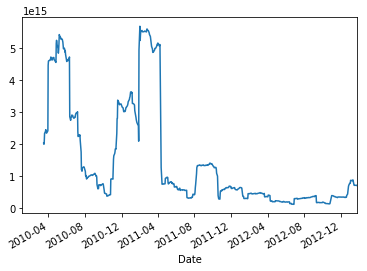

In [63]:
f.rolling(window=50)['Volume'].var().plot()

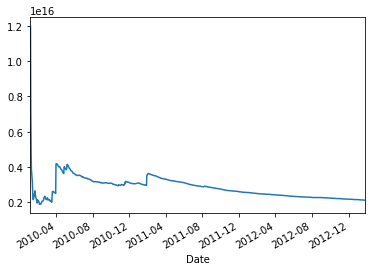

In [65]:
f.expanding()['Volume'].var().plot()

In [71]:
len(f[f.Close>f.Open])

352